# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

In [1]:
conda info --envs

# conda environments:
#
base                     F:\ApplicationsAnaconda3
CNNRNN                *  F:\ApplicationsAnaconda3\envs\CNNRNN
deployment               F:\ApplicationsAnaconda3\envs\deployment


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda list -n CNNRNN

# packages in environment at F:\ApplicationsAnaconda3\envs\CNNRNN:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
_tflow_select             2.1.0                       gpu  
absl-py                   0.11.0           py37haa95532_0  
aiohttp-cors              0.7.0                    pypi_0    pypi
aioredis                  1.3.1                    pypi_0    pypi
alabaster                 0.7.12                   py37_0  
anaconda                  2019.10                  py37_0  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.10.0                   py37_0  
anaconda-project          0.8.3                      py_0  
aniso8601                 8.1.0                    pypi_0    pypi
appdirs                   1.4.4                    pypi_0    pypi
asn1crypto                1.0.1                    py37_0  
astor                     0.8.1                    py37_0  


In [17]:
#Import all the required libraries

# System Libraries 
import os, glob
from glob import glob
import pickle
from sys import getsizeof

# Date and Time 
import datetime

# Data manipulation
import numpy as np
import pandas as pd
import collections, random, re
from collections import Counter


# Model building 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


#Read/Display  images
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [13]:
#Import all the required libraries
# tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model


In [3]:
*8888///
import tensorflow as tf 
from keras.preprocessing.sequence import pad_sequences 
from keras.preprocessing.text import Tokenizer 
from keras.models import Model 
from keras.layers import Flatten, Dense, LSTM, Dropout, Embedding, Activation 
from keras.layers import concatenate, BatchNormalization, Input
from keras.layers.merge import add 
from keras.utils import to_categorical, plot_model 
from keras.applications.inception_v3 import InceptionV3, preprocess_input 
import matplotlib.pyplot as plt  # for plotting data 
import cv2 

Using TensorFlow backend.


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from keras.utils import plot_model

Using TensorFlow backend.


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
import re

Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create word-to-index and index-to-word mappings.

4.Create a dataframe which summarizes the image, path & captions as a dataframe

5.Visualise the top 30 occuring words in the captions

6.Create a list which contains all the captions & path


In [15]:
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
   
    for ax,image in zip(axes, images):
        ax.imshow(io.imread(image), cmap)

### Global Variables

In [5]:
IMAGE_PATH = 'Images/'
CAPTIONS_FILE = 'captions.txt'

In [6]:
#Import the dataset and read the image into a seperate variable
all_imgs = glob(IMAGE_PATH + '*.jpg')
print("The total images present in the dataset: {}".format(len(all_imgs)))
print(all_imgs[0])

The total images present in the dataset: 8091
Images\1000268201_693b08cb0e.jpg


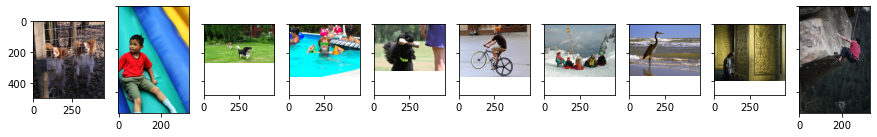

In [18]:
plot_image(all_imgs[8081:])

#### Obeservation of images:
- Images are of different sizes
- Each image has object we can use the noun verb relationship to generate 
sentence
- Can identify the color of the object
- There are 8091 total images

### Caption file pre processing

In [60]:
#### Creating dataframe column 

import pandas as pd
captions_df = pd.read_csv(CAPTIONS_FILE)
captions_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 2 columns):
image      40455 non-null object
caption    40455 non-null object
dtypes: object(2)
memory usage: 632.2+ KB


#### Text file observations
- For each image 8091 there are the five captions 
captions = 5 * 8091 = 40455.
- Total captions text = 40455

In [57]:
captions_df.nunique()

image       8091
caption    40201
dtype: int64

In [61]:
captions_test = captions_df.drop_duplicates(keep='first')#[(captions_df.caption.unique())]
captions_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40445 entries, 0 to 40454
Data columns (total 2 columns):
image      40445 non-null object
caption    40445 non-null object
dtypes: object(2)
memory usage: 947.9+ KB


In [66]:
captions_test1 = captions_df[captions_df.duplicated()]

In [69]:
captions_test1['image'] = captions_test1.image.apply(lambda x : IMAGE_PATH+x)
captions_test1

,image,caption
7468,Images/2305437797_e6c3460190.jpg,A dog swimming with a stick in its mouth .
7827,Images/2335619125_2e2034f2c3.jpg,A black dog is running through the snow .
9467,Images/2441629086_52f68eb316.jpg,A girl peers into a window .
14021,Images/2737729252_b3fd9c05b1.jpg,A girl is taking a picture of another girl in ...
23917,Images/3262075846_5695021d84.jpg,A group of men are playing rugby .
25672,Images/3337046794_296bd2c7e0.jpg,A black dog is digging in the snow .
26218,Images/3355827928_c96c0c3e88.jpg,A man on a bike in midair
31181,Images/3552796830_2dd2aa9c2c.jpg,Two men in camouflage pants are running past a...
35252,Images/3730457171_e66dde8c91.jpg,A little girl rides a tricycle .
37303,Images/485741580_ab523fa657.jpg,A dog in a car .


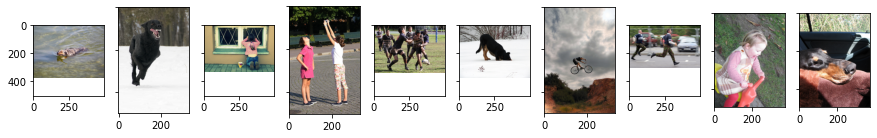

In [70]:
plot_image(captions_test1.image)

In [39]:
#print(captions_df[~(captions_df.caption.isin(captions_df.caption.unique()))])
for img in captions_test1.image:
    print (captions_df.captions for captions_df.captions in 

Empty DataFrame
Columns: [image, caption]
Index: []


In [41]:
captions_test = captions_df[~(captions_df.caption.isin(captions_df.caption.unique()))]
print(captions_test.info())
print(captions_test.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 2 columns):
image      0 non-null object
caption    0 non-null object
dtypes: object(2)
memory usage: 0.0+ bytes
None
Empty DataFrame
Columns: [image, caption]
Index: []


In [ ]:
captions_df.describe()

#### Visualise both the images & text present in the dataset


In [ ]:
plot_image(all_imgs[:10])
captions_df.head(10)

In [14]:
captions_df.image.unique()

array(['1000268201_693b08cb0e.jpg', '1001773457_577c3a7d70.jpg',
       '1002674143_1b742ab4b8.jpg', ..., '99679241_adc853a5c0.jpg',
       '997338199_7343367d7f.jpg', '997722733_0cb5439472.jpg'],
      dtype=object)

In [11]:
pd.set_option('display.max_colwidth',-1)

Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [12]:
captions_df = captions_df.rename(columns={'image':'ID','caption':'Captions'})
captions_df['Path'] = captions_df.ID.apply(lambda x : IMAGE_PATH+x ) 

captions_df.Captions =  captions_df.Captions.apply(lambda x : x.lower() )    


In [13]:
punctuations = '''!()[]{};:'"\,<>./?@#$%^&*_~'''
def remove_punctuations(word):
    
    for x in word:
        if x in punctuations:
            word = word.replace(x,"")
    return word
#div = list(filter(remove_punctuations, ['woman writing on a pad in room with gold , decorated walls .']))
captions_df["Captions"]=  captions_df.Captions.apply(lambda x : remove_punctuations(x))  


In [14]:
captions_df.tail(10)

,ID,Captions,Path
40445,997338199_7343367d7f.jpg,a person stands near golden walls,Images/997338199_7343367d7f.jpg
40446,997338199_7343367d7f.jpg,a woman behind a scrolled wall is writing,Images/997338199_7343367d7f.jpg
40447,997338199_7343367d7f.jpg,a woman standing near a decorated wall writes,Images/997338199_7343367d7f.jpg
40448,997338199_7343367d7f.jpg,the walls are covered in gold and patterns,Images/997338199_7343367d7f.jpg
40449,997338199_7343367d7f.jpg,woman writing on a pad in room with gold decorated walls,Images/997338199_7343367d7f.jpg
40450,997722733_0cb5439472.jpg,a man in a pink shirt climbs a rock face,Images/997722733_0cb5439472.jpg
40451,997722733_0cb5439472.jpg,a man is rock climbing high in the air,Images/997722733_0cb5439472.jpg
40452,997722733_0cb5439472.jpg,a person in a red shirt climbing up a rock face covered in assist handles,Images/997722733_0cb5439472.jpg
40453,997722733_0cb5439472.jpg,a rock climber in a red shirt,Images/997722733_0cb5439472.jpg
40454,997722733_0cb5439472.jpg,a rock climber practices on a rock climbing wall,Images/997722733_0cb5439472.jpg


In [15]:
def to_vocab(desc): 
    words = []#'word':[],'count':[]}
    for line in captions_df.Captions:
        for word in line.split():
            if word.isalpha():
                words.append(word)           
             
    return sorted(words)
vocab = to_vocab(captions_df.Captions)


In [16]:
print(vocab)


In [17]:
from collections import Counter

In [18]:
#Create the vocabulary & the counter for the captions
vocabulary=  Counter(vocab) #for caption in captions_df.Captions)#write your code here
for k,v in vocabulary.most_common(50):
    print(k,v)
print (len(vocabulary))

a 62986
in 18974
the 18418
on 10743
is 9345
and 8851
dog 8136
with 7765
man 7265
of 6713
two 5638
white 3940
black 3832
boy 3581
are 3504
woman 3402
girl 3328
to 3173
wearing 3062
at 2914
people 2883
water 2783
red 2672
young 2630
brown 2563
an 2432
his 2357
blue 2268
dogs 2125
running 2073
through 2032
playing 2008
while 1968
down 1825
shirt 1806
standing 1787
ball 1779
little 1768
grass 1622
child 1545
person 1542
snow 1492
jumping 1472
over 1414
front 1386
three 1381
sitting 1368
holding 1324
field 1280
small 1278
8378


In [38]:
vocab_5000 = vocabulary.most_common(5000)
print(vocab_5000)

[('a', 62986), ('in', 18974), ('the', 18418), ('on', 10743), ('is', 9345), ('and', 8851), ('dog', 8136), ('with', 7765), ('man', 7265), ('of', 6713), ('two', 5638), ('white', 3940), ('black', 3832), ('boy', 3581), ('are', 3504), ('woman', 3402), ('girl', 3328), ('to', 3173), ('wearing', 3062), ('at', 2914), ('people', 2883), ('water', 2783), ('red', 2672), ('young', 2630), ('brown', 2563), ('an', 2432), ('his', 2357), ('blue', 2268), ('dogs', 2125), ('running', 2073), ('through', 2032), ('playing', 2008), ('while', 1968), ('down', 1825), ('shirt', 1806), ('standing', 1787), ('ball', 1779), ('little', 1768), ('grass', 1622), ('child', 1545), ('person', 1542), ('snow', 1492), ('jumping', 1472), ('over', 1414), ('front', 1386), ('three', 1381), ('sitting', 1368), ('holding', 1324), ('field', 1280), ('small', 1278), ('up', 1260), ('by', 1248), ('large', 1235), ('green', 1225), ('group', 1218), ('one', 1217), ('yellow', 1213), ('her', 1178), ('walking', 1165), ('children', 1156), ('men', 11

In [ ]:
#Visualise the top 30 occuring words in the captions


#write your code here

In [109]:
#Create a list which contains all the captions
annotations=captions_df.Captions.apply(lambda x : '<start>'+x+'<end>')

#add the <start> & <end> token to all those captions as well

#Create a list which contains all the path to the images
all_img_path=captions_df.Path#write your code here

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))
print(annotations[:10])

Total captions present in the dataset: 40455
Total images present in the dataset: 40455
0    <start>a child in a pink dress is climbing up a set of stairs in an entry way <end>              
1    <start>a girl going into a wooden building <end>                                                 
2    <start>a little girl climbing into a wooden playhouse <end>                                      
3    <start>a little girl climbing the stairs to her playhouse <end>                                  
4    <start>a little girl in a pink dress going into a wooden cabin <end>                             
5    <start>a black dog and a spotted dog are fighting<end>                                           
6    <start>a black dog and a tri-colored dog playing with each other on the road <end>               
7    <start>a black dog and a white dog with brown spots are staring at each other in the street <end>
8    <start>two dogs of different breeds looking at each other on the road <end>        

## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [55]:
# create the tokenizer
#Special tokens 
START = "<start>" # Start of sentence for sequencing
END = "<end>" # End of sentence for sequencing
UNK = "<UNK>" # For Unknown words 
PAD = "<PAD>" # For batch padding

# 
def split_sentence(sentence):
    return list(filter(lambda x: len(x) > 0, re.split('\W+', sentence.lower())))

def generate_vocabulary(captions):
    vocabulary = {}#[PAD,UNK,START,END]
    words = []
    counts = {}
    index = 0
    
    for sentence in captions:
        sent_words = split_sentence(sentence)
        words.append(sent_words)
        for word in sent_words:
            if word not in counts.keys():
                counts[word] = 0
            counts[word] += 1
            vocabulary[word] = index
            index += 1
    vocabulary = {k:v  for k,v in vocabulary.items() if counts[word]>5 }
    # Adding word PAD, UNK, START and END to vocabulary
    vocabulary[PAD] = index
    vocabulary[UNK] = index + 1
    vocabulary[START] = index + 2
    vocabulary[END] = index + 3
    
    return {token: i for i, token in enumerate (sorted(vocabulary))}
    


In [56]:
vocab = generate_vocabulary(captions_df.Captions)
vocab_invers = {idx: w for w,idx in vocab.items()}
print(len(vocab))
print(vocab)

8490
{'08': 0, '1': 1, '10': 2, '104': 3, '11': 4, '12': 5, '13': 6, '13406': 7, '157': 8, '17': 9, '19': 10, '1915': 11, '1923': 12, '1950s': 13, '2': 14, '2008': 15, '21': 16, '22': 17, '23': 18, '25': 19, '28': 20, '281': 21, '29': 22, '3': 23, '30': 24, '32': 25, '33': 26, '3rd': 27, '4': 28, '42': 29, '4x4': 30, '5': 31, '50': 32, '52': 33, '528': 34, '57': 35, '58': 36, '6': 37, '625': 38, '661': 39, '7': 40, '75': 41, '8': 42, '80': 43, '84': 44, '90': 45, '93': 46, '97': 47, '<PAD>': 48, '<UNK>': 49, '<end>': 50, '<start>': 51, 'a': 52, 'abandon': 53, 'abandoned': 54, 'abarrotes': 55, 'abdomen': 56, 'ability': 57, 'aboard': 58, 'aboriginal': 59, 'about': 60, 'above': 61, 'abs': 62, 'abseiling': 63, 'ac': 64, 'accelerates': 65, 'accends': 66, 'accent': 67, 'accented': 68, 'accents': 69, 'accepting': 70, 'accepts': 71, 'accessories': 72, 'accident': 73, 'accompanied': 74, 'accompanies': 75, 'accompanying': 76, 'accordion': 77, 'accross': 78, 'ace': 79, 'acoustic': 80, 'acrobat': 

In [58]:
# create the tokenizer
#Special tokens 
START = "<start>" # Start of sentence for sequencing
END = "<end>" # End of sentence for sequencing
UNK = "<UNK>" # For Unknown words 
PAD = "<PAD>" # For batch padding

# 
def split_sentence(sentence):
    return list(filter(lambda x: len(x) > 0, re.split('\W+', sentence.lower())))

def generate_vocabulary1(captions):
    vocabulary = [PAD,UNK,START,END]
   
    words = []

    for sentence in captions:
        sent_words = split_sentence(sentence)
        for word in sent_words: 
            words.append(word)
    
    vocab =  Counter(words)
    vocab = vocab.most_common(5000) #for caption in captions_df.Captions)#write your code here
    
    print(vocab[:50])
    
    
    print (len(vocabulary),vocabulary)
    
    
    return {token: i for i, token in enumerate (vocab)}
    


In [60]:
vocab1 = generate_vocabulary1(captions_df.Captions)
vocab_invers1 = {idx: w for w,idx in vocab.items()}
print(len(vocab1))
print(vocab_invers1)

[('a', 62991), ('in', 18986), ('the', 18419), ('on', 10745), ('is', 9345), ('and', 8862), ('dog', 8138), ('with', 7765), ('man', 7274), ('of', 6723), ('two', 5642), ('white', 3959), ('black', 3848), ('boy', 3581), ('are', 3504), ('woman', 3402), ('girl', 3328), ('to', 3176), ('wearing', 3062), ('at', 2914), ('people', 2883), ('water', 2790), ('red', 2691), ('young', 2630), ('brown', 2578), ('an', 2432), ('his', 2357), ('blue', 2279), ('dogs', 2125), ('running', 2073), ('through', 2032), ('playing', 2008), ('while', 1968), ('shirt', 1962), ('down', 1843), ('standing', 1787), ('ball', 1783), ('little', 1768), ('grass', 1622), ('snow', 1547), ('child', 1545), ('person', 1542), ('jumping', 1473), ('over', 1415), ('three', 1387), ('front', 1386), ('sitting', 1368), ('holding', 1324), ('up', 1302), ('field', 1283)]
4 ['<PAD>', '<UNK>', '<start>', '<end>']
5000
{0: ('a', 62991), 1: ('in', 18986), 2: ('the', 18419), 3: ('on', 10745), 4: ('is', 9345), 5: ('and', 8862), 6: ('dog', 8138), 7: ('wi

In [66]:
print(vocab1['mural'])

KeyError: 'mural'

In [61]:
# word-to-index and index-to-word mappings.
def caption_word_to_index (captions_df, vocab):
    """ 
    captions argument is an array of array of image captions
    [[ image_ID2 caption1
       image_ID2 caption1
    image_path and captions 
    ID Captions Path
    
    """
    result = []
    a = []
    for caption in captions_df.Captions:
        words = split_sentence(caption)
        lis = []
        lis.append(vocab[START])
        for word in words:
            if word not in vocab.keys():
                lis.append(vocab[UNK])
            else:
                lis.append(vocab[word])
        lis.append(vocab[END])
        a.append(lis)
    result.append(a)
    return result

In [62]:
words_to_index = caption_word_to_index(captions_df,vocab1)
index_to_words = {idx: w for w, idx in vocab1.items()}


KeyError: '<start>'

In [36]:
for k,v train_captions_indexed 
print(train_captions_indexed)

1
[[[51, 52, 1392, 3731, 52, 5372, 2274, 3822, 1496, 7964, 52, 6386, 4879, 7048, 3731, 229, 2495, 8194, 50], [51, 52, 3137, 3192, 3804, 52, 8372, 1031, 50], [51, 52, 4236, 3137, 1496, 3804, 52, 8372, 5435, 50], [51, 52, 4236, 3137, 1496, 7549, 7048, 7648, 3516, 5435, 50], [51, 52, 4236, 3137, 3731, 52, 5372, 2274, 3192, 3804, 52, 8372, 1121, 50], [51, 52, 760, 2190, 234, 52, 6978, 2190, 312, 2732, 50], [51, 52, 760, 2190, 234, 52, 7785, 1593, 2190, 5436, 8353, 2353, 4964, 4903, 7549, 6054, 50], [51, 52, 760, 2190, 234, 52, 8272, 2190, 8353, 996, 6977, 312, 7066, 379, 2353, 4964, 3731, 7549, 7181, 50], [51, 7894, 2194, 4879, 2087, 952, 4285, 379, 2353, 4964, 4903, 7549, 6054, 50], [51, 7894, 2194, 4903, 5193, 4657, 7712, 2353, 4964, 50], [51, 52, 4236, 3137, 1786, 3731, 5062, 6605, 3731, 3020, 4879, 52, 5065, 5811, 8353, 3516, 3405, 3731, 52, 903, 50], [51, 52, 4236, 3137, 3822, 6606, 3731, 3020, 4879, 52, 4074, 5065, 5811, 50], [51, 52, 6731, 3137, 3731, 7549, 3250, 5440, 8353, 2752, 3

In [ ]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing

#your code here

In [ ]:
# Pad each vector to the max_length of the captions ^ store it to a vairable

cap_vector= #your code here

print("The shape of Caption vector is :" + str(cap_vector.shape))

## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

In [ ]:
#write your code here

## Create the train & test data 
1.Combine both images & captions to create the train & test dataset using tf.data.Dataset API. Create the train-test spliit using 80-20 ratio & random state = 42

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 299, 299, 3)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [ ]:
#write your code here

In [ ]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape) #(batch_size, 299, 299, 3)
print(sample_cap_batch.shape) #(batch_size, max_len)

## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of thei mage using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [ ]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = #write code here to get the input of the image_model
hidden_layer = #write code here to get the output of the image_model

image_features_extract_model = #build the final model using both input & output layer

In [ ]:
# write your code to extract features from each image in the dataset



In [ ]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,40)

## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [ ]:
embedding_dim = 256 
units = 512
vocab_size = #top 5,000 words +1
train_num_steps = =#len(total train images) // BATCH_SIZE
test_num_steps = #len(total test images) // BATCH_SIZE

### Encoder

In [ ]:
class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = #build your Dense layer with relu activation
        
    def call(self, features):
        features =  # extract the features from the image shape: (batch, 8*8, embed_dim)
        
        return features

In [ ]:
encoder=Encoder(embedding_dim)

### Attention model

In [ ]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = #build your Dense layer
        self.W2 = #build your Dense layer
        self.V = #build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis =  # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        score = # build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights =  # extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector =  #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = # reduce the shape to (batch_size, embedding_dim)
        

        return context_vector, attention_weights

### Decoder

In [ ]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = #iniitalise your Attention model with units
        self.embed = #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = #build your Dense layer
        self.d2 = #build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = #create your context vector & attention weights from attention model
        embed =  # embed your input to shape: (batch_size, 1, embedding_dim)
        embed =  # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [ ]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [ ]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [ ]:
optimizer = #define the optimizer
loss_object = #define your loss object

In [ ]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [ ]:
checkpoint_path = "your checkpoint path"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path_ckpt, max_to_keep=5)

In [ ]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [ ]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.reset_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        #write your code here to do the training steps
        
    return loss, avg_loss

In [ ]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    
    #write your code here to do the testing steps
        
    return loss, avg_loss

In [ ]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data
    
    return avg_test_loss

In [ ]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

In [ ]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [ ]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = # extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = # get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = #extract the predicted id(embedded value) which carries the max value
        #map the id to the word from tokenizer and append the value to the result list

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


### Beam Search(optional)

In [ ]:
def beam_evaluate(image, beam_index = #your value for beam index):

    #write your code to evaluate the result using beam search
                  
    return final_caption



In [ ]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [1]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [ ]:
rid = np.random.randint(0, len(img_test))
test_image = img_test[rid]
#test_image = './images/413231421_43833a11f5.jpg'
#real_caption = '<start> black dog is digging in the snow <end>'

real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
result, attention_plot,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate, weights=#set your weights)
print(f"BELU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)


Image.open(test_image)

In [ ]:
captions=beam_evaluate(test_image)
print(captions)

In [72]:
import BeautifulSoup
from BeautifulSoup import BeautifulSoup
import urllib2
import re

html_page = urllib2.urlopen("https://arstechnica.com")
soup = BeautifulSoup(html_page)
links = []

for link in soup.findAll('a', attrs={'href': re.compile("^http://")}):
    links.append(link.get('href'))

print(links)

ModuleNotFoundError: No module named 'BeautifulSoup'

In [73]:
conda install -c anaconda beautifulsoup4

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
